In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data, low_memory=False)
clinical_trial_df = pd.read_csv(clinical_trial_data, low_memory=False)

# Combine the data into a single dataset
full_df = pd.merge(mouse_df, clinical_trial_df, how='outer', on='Mouse ID')

# Display the data table for preview
full_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_drug_timepoint_group = full_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
# Create variable to sotre average tumor volume
average_tumor_volume = tumor_drug_timepoint_group.mean()

# Convert to DataFrame
average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()

# Preview DataFrame
average_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = tumor_drug_timepoint_group.sem()

# Convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors).reset_index()

# Preview DataFrame
tumor_standard_errors_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
organized_tumor_df = average_tumor_volume_df.pivot(index='Timepoint',columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
organized_tumor_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


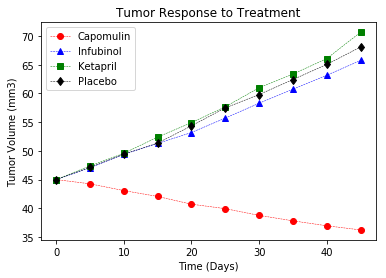

In [6]:
# Generate the Plot (with Error Bars)
tumor_drug_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in tumor_drug_list:
    # Create variable to store the standard errors for creating error bars
    standard_errors1 = tumor_standard_errors[drug]
    # Create variable for graph
    tumor_volume_plt = plt.errorbar(organized_tumor_df.index,organized_tumor_df[drug],
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')


# Save the Figure
plt.savefig("AverageTumorGrowthGraph.png")


In [7]:
# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_drug_timepoint_group = full_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
# Create variable to store the average metastatic sites per drug at each timepoint
average_meta_site = meta_drug_timepoint_group.mean()

# Convert to DataFrame
average_meta_site_df = pd.DataFrame(average_meta_site).reset_index()

# Preview DataFrame
average_meta_site_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_standard_errors = meta_drug_timepoint_group.sem()

# Convert to DataFrame
meta_standard_errors_df = pd.DataFrame(meta_standard_errors).reset_index()

# Preview DataFrame
meta_standard_errors_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
organized_meta_df = average_meta_site_df.pivot(index='Timepoint',columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
organized_meta_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


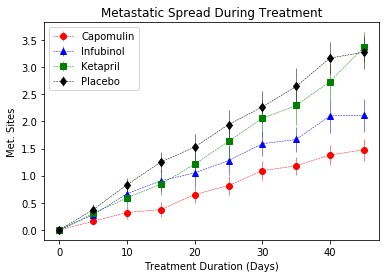

In [11]:
# Generate the Plot (with Error Bars)
meta_drug_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in meta_drug_list:
    # Create variable to store the standard errors for creating error bars
    standard_errors2 = meta_standard_errors[drug]
    # Create variable for graph
    meta_during_plt = plt.errorbar(organized_meta_df.index,organized_meta_df[drug],standard_errors2,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')


# Save the Figure
plt.savefig("AverageMetastaticSitesGraph.png")


In [12]:
# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_drug_timepoint_group = full_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
# Create variable to store actual count of mice
mice_count = mice_drug_timepoint_group.nunique()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index()

# Preview DataFrame
mice_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
organized_mice_count_df = mice_count_df.pivot(index='Timepoint',columns='Drug')['Mouse ID']

# Preview that Reformatting worked
organized_mice_count_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


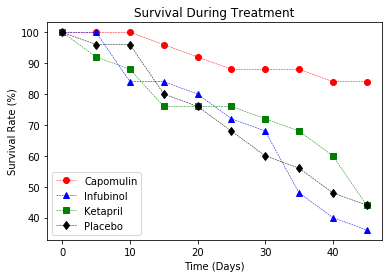

In [15]:
# Generate the Plot (Accounting for percentages)
mice_drug_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in mice_drug_list:
    # Create variable to store total counts of mice
    total_mouse = organized_mice_count_df[drug][0]
    # Create variable to convert values into percentages instead of counts
    survival_rate = (organized_mice_count_df[drug]/total_mouse)*100 
    # Create variable for graph
    mice_count_plt = plt.plot(organized_mice_count_df.index, survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')


# Save the Figure
plt.savefig("MiceSurvivalRatesGraph.png")


In [16]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
percentage_drug_change = (organized_tumor_df.iloc[-1]/(organized_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_drug_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

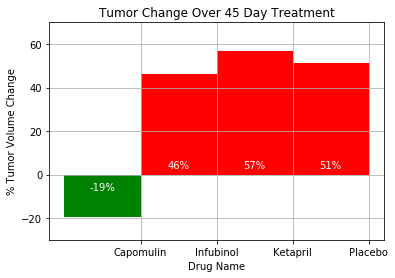

In [46]:
# Store all Relevant Percent Changes into a Tuple
percent_drug_changes = tuple(zip(percentage_drug_change,percentage_drug_change.index))

# Splice the data between passing and failing drugs
passing = percentage_drug_change < 0

# Orient widths. Add labels, tick marks, etc. 
summary_drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
percent_change_list = [(percentage_drug_change[drug])for drug in summary_drug_list]
percent_change_plt = plt.bar(summary_drug_list,percent_change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.xlabel('Drug Name')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(percent_change_plt)

# Save the Figure
plt.savefig("TumorChangeOverTreatment.png")


Obersevable Trends Based on Data:

1.) It appears that based on the last compilation of data reporting the percentage change in tumor growth over the 45 day treatment, not many drugs work. Capomulin & Ramicane are seemingly great drug choices for there was significant amount of tumor recession. However, there are still so many other variables that could be leading to tumor growth in these patients.

2.) It appears that as time goes on there is more metastic sites occuring within each patient. Based on the fact that tumor growth continued at a steady pace for most of the mice, this is not a very surprising finding. Metastatic sites appear steadily alongside tumors durinc cancer. If tumor growth had gone down for a majority of the patients we would expect metastatic sites to decline as well.

3.) It appears that in order to understand this data fully you would need to know a decent amount about tumor growth. Is 45 days a quick time for this much growth? If so, did the drugs that saw steady growth in tumor during treatment result in a faster paced tumor growth? This is more than just a study on whether the drugs work, but also a study on if they increase rate of growth and could have been potentially more harmful. Also, could there be side effects from the two drug choices that stopped growth, and would continued treatment result in a complete tumor removal?